In [1]:
import sys
import sympy as sp
import numpy as np
from scipy.integrate import quad
from scipy.stats import norm
import matplotlib.pyplot as plt
from sympy.utilities import lambdify
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

c:\Users\Mateusz Kowalski\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.25.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
sp.init_printing()

In [3]:
x = sp.Symbol('x', real=True)
k = sp.Symbol('k', real=True, positive=True)
a = sp.Symbol('a', real=True)
m = sp.Symbol('m', real=True, positive=True)
t = sp.Symbol('t', real=True, positive=True)
h = sp.Symbol('hbar', real=True, positive=True)
n = sp.Symbol('n', integer=True, nonzero=True)
psi = sp.Function('psi')

x, k, a, m, t, h, n, psi(x)

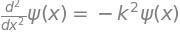

In [4]:
eq = sp.Eq(psi(x).diff(x, x), -k**2 * psi(x))
eq

In [5]:
sp.dsolve(eq, psi(x))

In [6]:
sp.dsolve(eq, psi(x), ics={psi(0): 0, psi(a): 0})

In [7]:
sol = sp.dsolve(eq, psi(x), ics={psi(0): 0})
sol

In [8]:
sol = sol.subs(k, n * sp.pi / a)
sol

In [9]:
sol = sol.subs(sp.Symbol('C1'), sp.sqrt(2 / a))
sol

In [10]:
sol.rhs * x * sol.rhs

In [11]:
xsr = sp.integrate(sol.rhs * x * sol.rhs, (x, 0, a)).simplify()
xsr

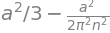

In [12]:
xsr_2 = sp.integrate(sol.rhs * x**2 * sol.rhs, (x, 0, a)).simplify()
xsr_2

$$\sigma_X^2=<x^2>-<x>^2$$

$$<p>=?$$
$$<p^2>=?$$
$$\sigma_P^2=?$$

$$\sigma_X \sigma_P \geq \frac{\hbar}{2}$$

Spradzić, czy ta zasada nieoznaczoności jest faktycznie dla tej studni potencjału spełniona.

In [13]:
p = -sp.I * h
p

In [14]:
diff_psi = sol.rhs.diff(x).simplify()
diff_psi

$$<p> = \int_0^a (\sqrt{\frac{2}{a}} \sin(\frac{\pi n x}{a}))(-ih)(\frac{\sqrt{\frac{2}{a}}\pi n \cos(\frac{\pi n x}{a})}{a}) dx$$

In [15]:
psr = sp.integrate(sol.rhs * p * diff_psi, (x, 0, a)).simplify()
psr

$$<p> = 0$$

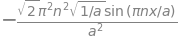

In [16]:
diff_2_psi = sol.rhs.diff(x,x).simplify()
diff_2_psi

$$<p^2> = \int_0^a (\sqrt\frac{2}{a} sin(\frac{\pi n x}{a}))(-h^2)(-\frac{\sqrt2 \pi^2 n^2 \sqrt\frac{1}{a} \sin(\frac{\pi n x}{a})}{a^2}) dx$$

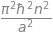

In [17]:
psr_2 = sp.integrate(sol.rhs * p**2 * diff_2_psi, (x, 0, a)).simplify()
psr_2

$$<p^2>=\frac{\pi^2\hbar^2n^2}{a^2}$$

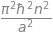

In [18]:
sigmaP = psr_2 - psr**2
sigmaP

$$<p>=0$$
$$<p^2>=\frac{\pi^2\hbar^2n^2}{a^2}$$
$$\sigma_P^2=\frac{\pi^2\hbar^2n^2}{a^2}-0=\frac{\pi^2\hbar^2n^2}{a^2}$$

Wyliczenie $\sigma_X^2$:

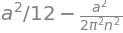

In [19]:
sigmaX = xsr_2 - xsr**2
sigmaX.simplify()

$$\sigma_X^2 = \frac{a^2}{12} - \frac{a^2}{2 \pi^2 n^2}$$

In [20]:
sigmas = sp.sqrt(sigmaX)*sp.sqrt(sigmaP)
sigmas.simplify()

$$\sigma_X \sigma_P \geq \frac{\hbar}{2}$$
gdzie: $$\sigma_X \sigma_P = \frac{h \sqrt{3\pi^2n^2-18}}{6}$$

Rozwiązywanie równania:

In [21]:
equation = sigmas>=h/2
equation.simplify()

In [22]:
equation = sigmas*2/h>=1
equation1 = equation.simplify()
equation1

Wartość gdy n=1 (minimalna wartość):

In [23]:
min_val = np.sqrt(3*np.pi**2 * (1**2) - 18)/3
min_val

$$1.13572361677322 \ge 1$$
Dla n=1 (minimalna wartość) nierówność jest spełniona. Dla n $\in$ [2,3,...) wartość będzie rosła, i zawsze będzie większa od 1, czyli nierówność ta jest zawsze spełniona (zasada nieoznaczoności dla tej studni potencjału jest spełniona).